In [ ]:
#find the highest peak per channel and plots it

In [1]:
import os
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

In [4]:
path_dir: str = r"/home/svergani/monitoring/files/raw_display_1/"

In [6]:
f = h5.File(os.sep.join([path_dir, "raw_display_1-220525-151538.hdf5"]), "r")

OSError: Unable to open file (unable to open file: name = '/home/svergani/monitoring/files/raw_display_1//raw_display_1-220525-151538.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
all_h5_objs = []
f.visit(all_h5_objs.append)
all_groups   = [ obj for obj in all_h5_objs if isinstance(f[obj],h5.Group) ]
all_datasets = [ obj for obj in all_h5_objs if isinstance(f[obj],h5.Dataset) ]
print(all_h5_objs)

['data', 'data/axis0', 'data/axis1', 'data/block0_items', 'data/block0_values']


In [10]:
channels = np.array(f.get('data/axis0').value)

In [11]:
timestamps = np.array(f.get('data/axis1').value)

In [12]:
#first index is timestamp second channel
df = pd.read_hdf(os.sep.join([path_dir, "raw_display-0-220525-151538.hdf5"]))
print(df)

    2560  2561  2562  2563  2564  2565  2566  2567  2568  2569  ...   2790  \
0   2449  2546  2431  2505  2281  2403  2431  2444  2322  2432  ...   2519   
1   2442  2546  2430  2504  2285  2400  2426  2440  2318  2430  ...   2523   
2   2442  2546  2428  2499  2287  2398  2422  2441  2320  2425  ...   2525   
3   2442  2547  2427  2497  2286  2398  2421  2441  2321  2423  ...   2525   
4   2441  2547  2427  2497  2290  2397  2423  2436  2321  2428  ...   2525   
5   2443  2547  2428  2498  2288  2395  2425  2438  2326  2428  ...   2528   
6   2445  2547  2428  2502  2288  2403  2426  2438  2327  2433  ...   2526   
7   2453  2547  2424  2507  2287  2402  2426  2434  2330  2432  ...   2526   
8   2453  2546  2424  2508  2284  2406  2430  2435  2331  2428  ...   2525   
9   2453  2548  2426  2509  2287  2407  2431  2435  2331  2429  ...   2522   
10  2453  2549  2429  2505  2293  2407  2431  2434  2328  2427  ...   2522   
11  2453  2547  2431  2501  2295  2405  2433  2432  2324  2428  

In [13]:
channel_0 = []
for i in range(np.amax(timestamps)+1):
    channel_0.append(df.iat[i,0])
    
channel_0 = np.array(channel_0)

In [14]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [30, 20]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

Text(0.5,1,'ADC for Channel 2560 over 80 timestamps')

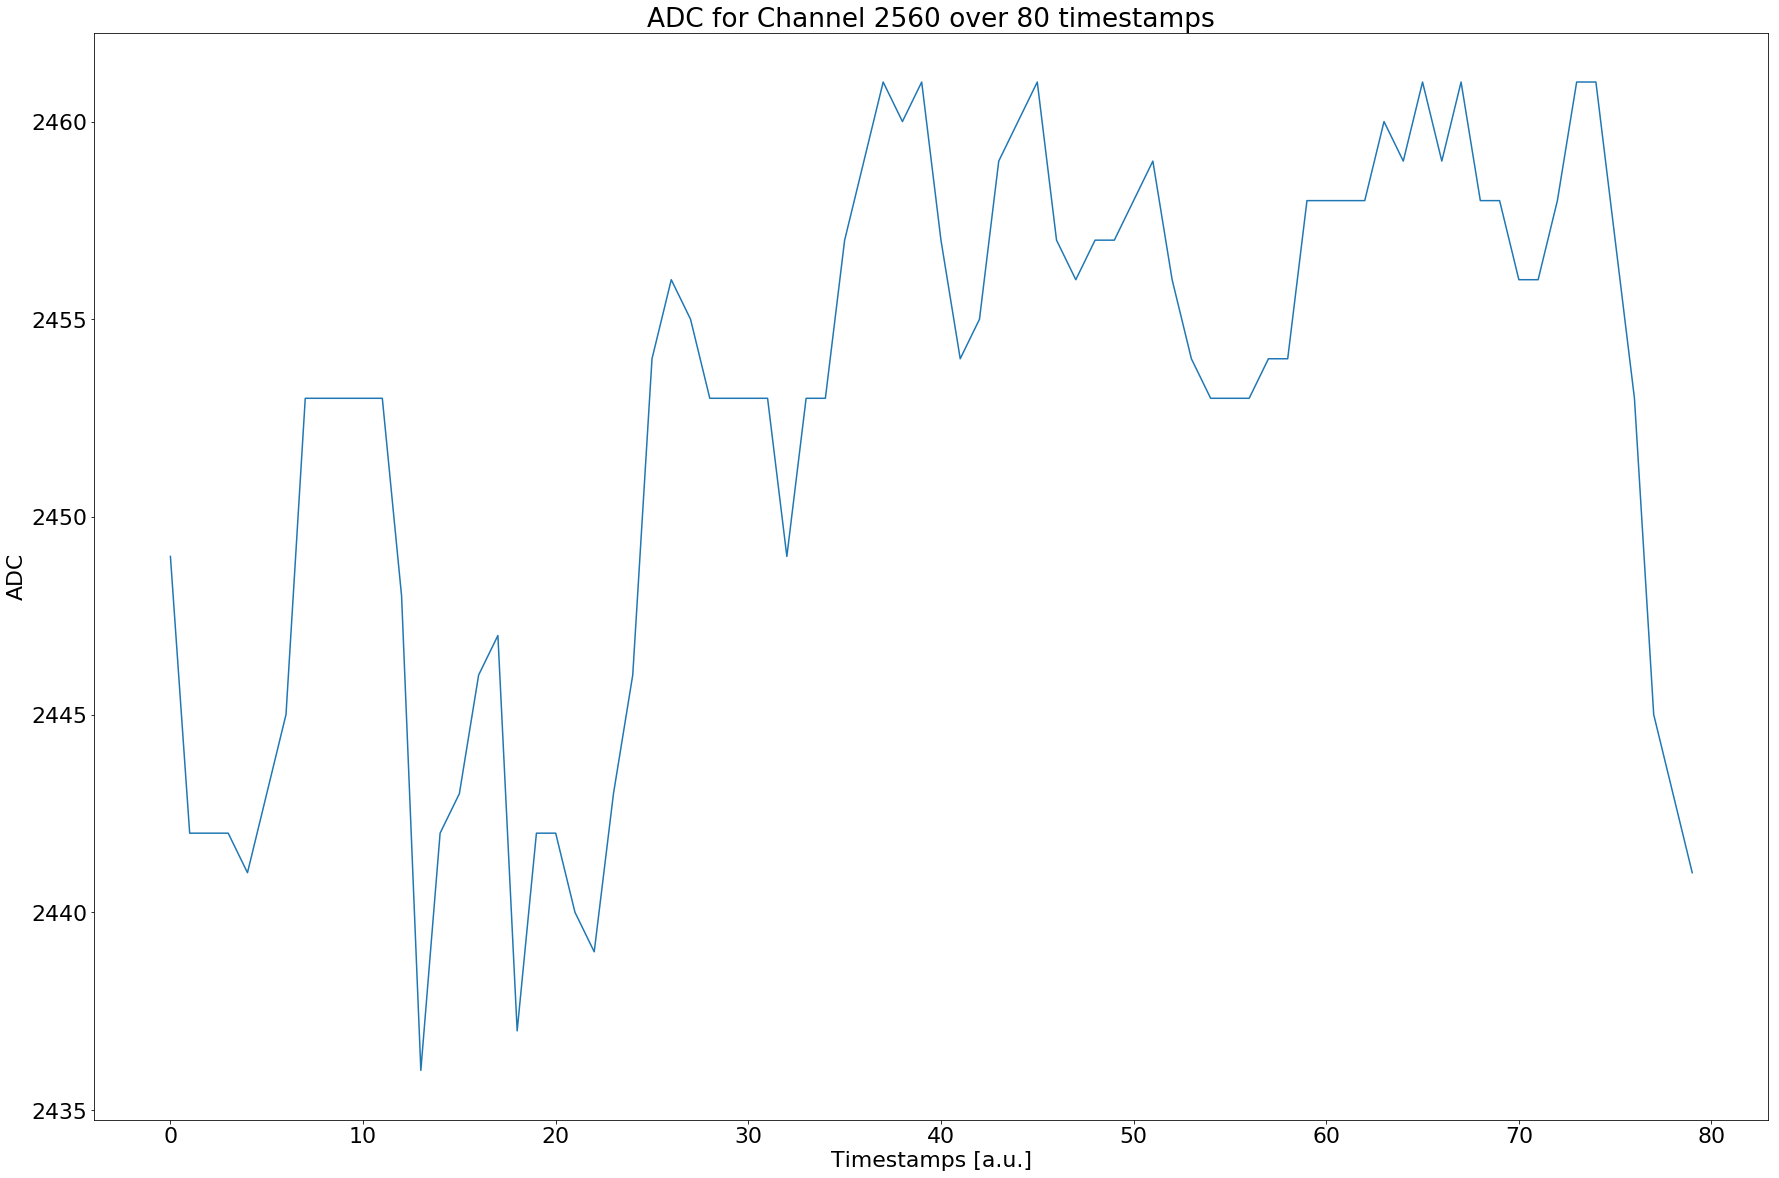

In [28]:
#Plot the first waveforms
fig, ax = plt.subplots()
ax.plot(timestamps,channel_0,label="Input Pulse")
ax.set_xlabel("Timestamps [a.u.]")
ax.set_ylabel("ADC")
ax.set_title("ADC for Channel 2560 over 80 timestamps")

In [25]:
adc = []
for j in range(channels.size):
    temp = []
    for i in range(timestamps.size):
        temp.append(df.iat[i,j])
    adc.append(temp)
    
adc = np.array(adc)

Text(0.5,1,'ADC for All Channels over 80 timestamps')

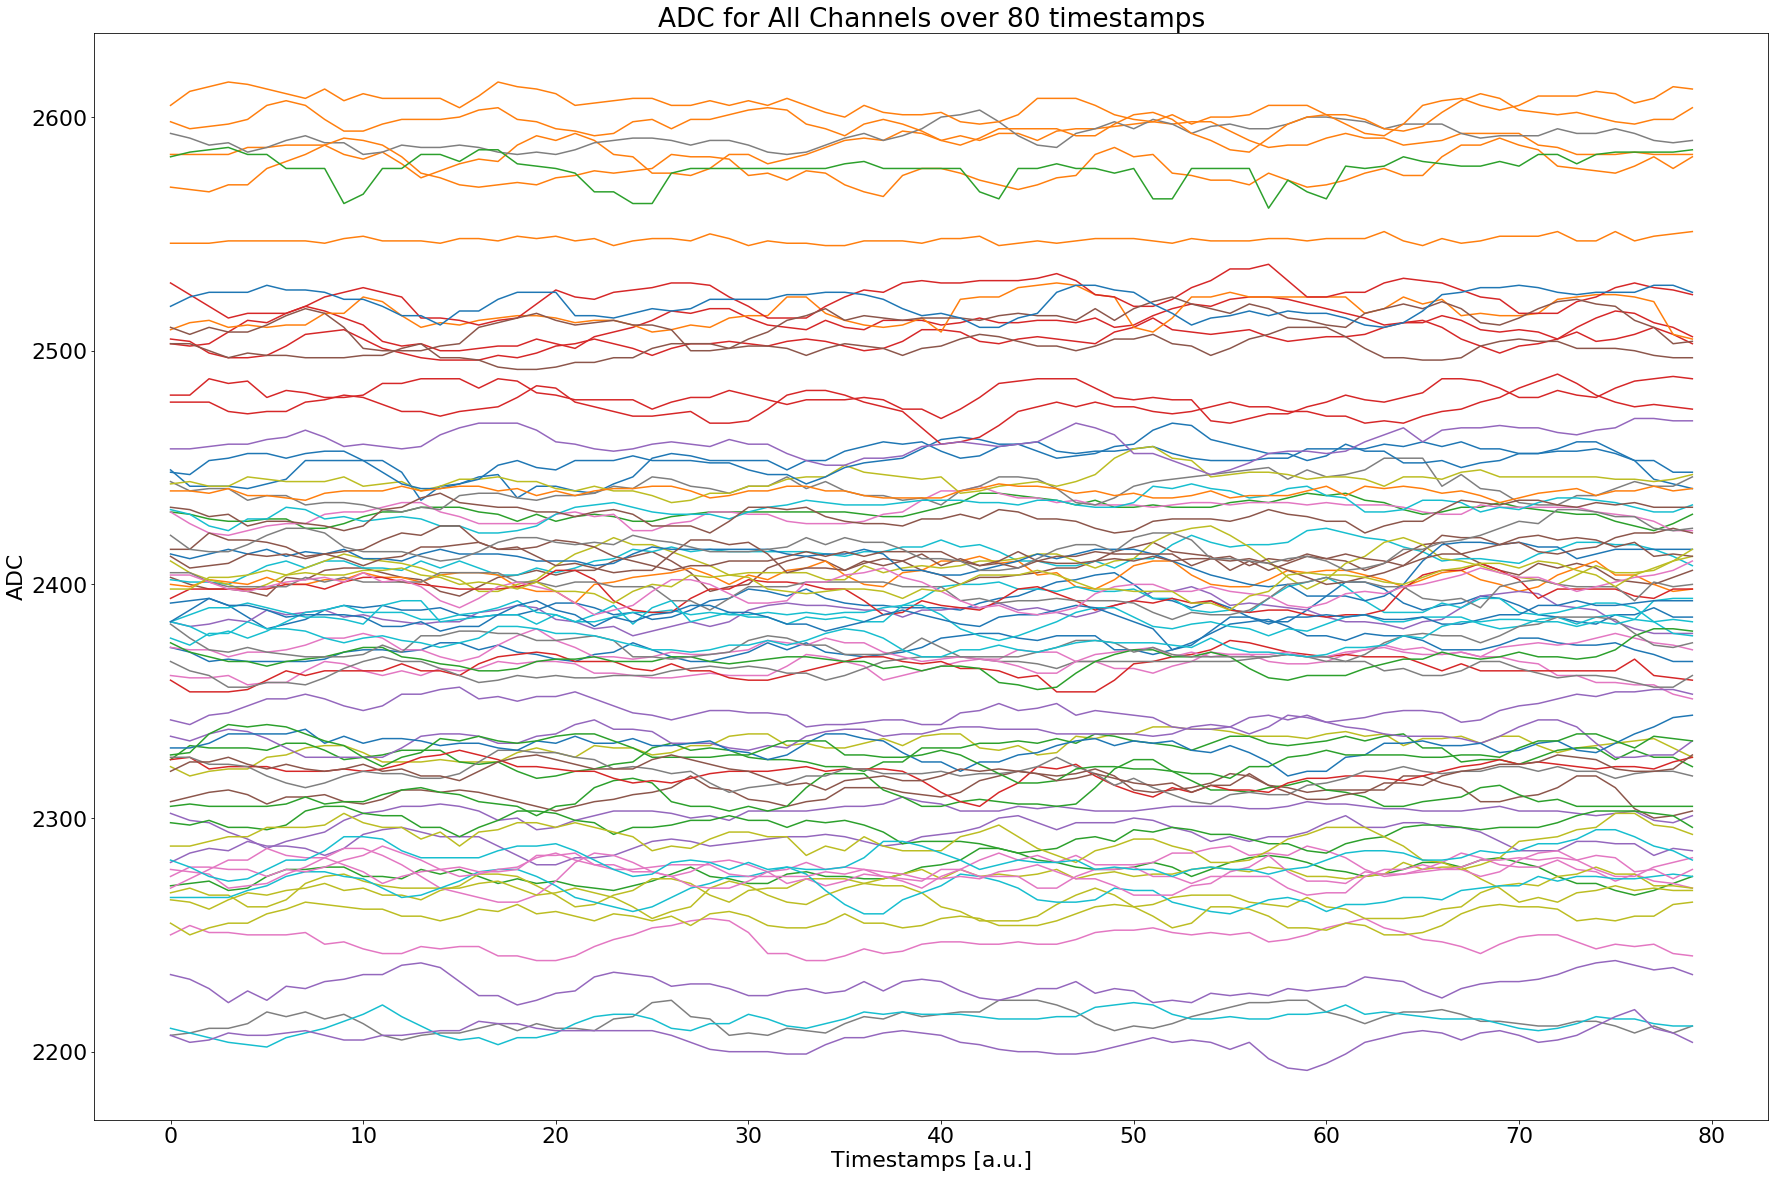

In [27]:
#Plot the all waveforms
fig, ax = plt.subplots()
for i in range(adc.shape[1]):
    ax.plot(timestamps,adc[i,:],label=i)
ax.set_xlabel("Timestamps [a.u.]")
ax.set_ylabel("ADC")
ax.set_title("ADC for All Channels over 80 timestamps")

In [18]:
adc.shape[1]

80

In [19]:
channel_0

array([2449, 2442, 2442, 2442, 2441, 2443, 2445, 2453, 2453, 2453, 2453,
       2453, 2448, 2436, 2442, 2443, 2446, 2447, 2437, 2442, 2442, 2440,
       2439, 2443, 2446, 2454, 2456, 2455, 2453, 2453, 2453, 2453, 2449,
       2453, 2453, 2457, 2459, 2461, 2460, 2461, 2457, 2454, 2455, 2459,
       2460, 2461, 2457, 2456, 2457, 2457, 2458, 2459, 2456, 2454, 2453,
       2453, 2453, 2454, 2454, 2458, 2458, 2458, 2458, 2460, 2459, 2461,
       2459, 2461, 2458, 2458, 2456, 2456, 2458, 2461, 2461, 2457, 2453,
       2445, 2443, 2441])

In [24]:
adc[:,0]

array([2449, 2442, 2442, 2442, 2441, 2443, 2445, 2453, 2453, 2453, 2453,
       2453, 2448, 2436, 2442, 2443, 2446, 2447, 2437, 2442, 2442, 2440,
       2439, 2443, 2446, 2454, 2456, 2455, 2453, 2453, 2453, 2453, 2449,
       2453, 2453, 2457, 2459, 2461, 2460, 2461, 2457, 2454, 2455, 2459,
       2460, 2461, 2457, 2456, 2457, 2457, 2458, 2459, 2456, 2454, 2453,
       2453, 2453, 2454, 2454, 2458, 2458, 2458, 2458, 2460, 2459, 2461,
       2459, 2461, 2458, 2458, 2456, 2456, 2458, 2461, 2461, 2457, 2453,
       2445, 2443, 2441])